## Import the Required Libraries

In [1]:
# For Data Analysis and exploration
import pandas as pd


# For numerical computations
import numpy as np


#for plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read the dataset

In [2]:
df = pd.read_csv('players-data.csv') 

## 3. Data Cleaning

##  a. Understand the dataframe shape

In [3]:
df.shape

(18539, 58)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   full name                    18539 non-null  object
 1   overall_rating               18539 non-null  int64 
 2   value                        18539 non-null  int64 
 3   Positions Played             18539 non-null  object
 4   best_position                18539 non-null  object
 5   Nationality                  18539 non-null  object
 6   Image Link                   18539 non-null  object
 7   Age                          18539 non-null  int64 
 8   Height(in cm)                18539 non-null  int64 
 9   Weight(in kg)                18539 non-null  int64 
 10  Club Name                    18539 non-null  object
 11  Wage                         18539 non-null  int64 
 12  Release Clause               18539 non-null  int64 
 13  Club Position                18

In [5]:
df.columns

Index(['full name', 'overall_rating', 'value', 'Positions Played',
       'best_position', 'Nationality', 'Image Link', 'Age', 'Height(in cm)',
       'Weight(in kg)', 'Club Name', 'Wage', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'Preferred Foot',
       'skill_moves', 'National Team Name', 'National Team Position',
       'National Team Jersey Number', 'attacking_work_rate',
       'defensive_work_rate', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physicality', 'crossing', 'finishing', 'heading_accuracy',
       'Curve', 'freekick_accuracy', 'ballcontrol', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeper_diving',
       'goalkeeper_handling', ' goalkeeperkicking', 'Goalkeeper Ref

In [6]:
df[0:5]

,full name,overall_rating,value,Positions Played,best_position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,goalkeeperkicking,Goalkeeper Reflexes
0,Lionel Messi,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,...,94,75,96,20,35,24,6,11,15,8
1,Karim Benzema,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,...,89,84,90,43,24,18,13,11,5,7
2,Robert Lewandowski,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,...,81,90,88,35,42,19,15,6,12,10
3,Kevin De Bruyne,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,...,94,83,89,68,65,53,15,13,5,13
4,Kylian Mbappé,91,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,...,83,80,88,26,34,32,13,5,7,6


## Since we are to predict using player attributes we shall first off drop all columns that to not pertain to player attributes but first off it is always good practice to create a backup of the original dataset.

In [7]:
backup=df.copy()

In [8]:
df.drop(columns=['full name','Nationality','Image Link','Height(in cm)','Weight(in kg)','Club Name','Wage','Release Clause','Club Position','Contract Until','Club Jersey Number','Joined On','Preferred Foot','National Team Name','National Team Position','National Team Jersey Number'],inplace=True)

In [9]:
df.shape

(18539, 42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   overall_rating       18539 non-null  int64 
 1   value                18539 non-null  int64 
 2   Positions Played     18539 non-null  object
 3   best_position        18539 non-null  object
 4   Age                  18539 non-null  int64 
 5   skill_moves          18539 non-null  int64 
 6   attacking_work_rate  18539 non-null  object
 7   defensive_work_rate  18539 non-null  object
 8   pace                 18539 non-null  int64 
 9   shooting             18539 non-null  int64 
 10  passing              18539 non-null  int64 
 11  dribbling            18539 non-null  int64 
 12  defending            18539 non-null  int64 
 13  physicality          18539 non-null  int64 
 14  crossing             18539 non-null  int64 
 15  finishing            18539 non-null  int64 
 16  head

In [11]:
df['value']=df['value'].astype(float)

## checking for missing values

In [12]:
df.isna().sum()

overall_rating         0
value                  0
Positions Played       0
best_position          0
Age                    0
skill_moves            0
attacking_work_rate    0
defensive_work_rate    0
pace                   0
shooting               0
passing                0
dribbling              0
defending              0
physicality            0
crossing               0
finishing              0
heading_accuracy       0
Curve                  0
freekick_accuracy      0
ballcontrol            0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
composure              0
marking                0
standing_tackle        0
sliding_tackle         0
goalkeeper_diving      0
goalkeeper_handling    0


## Check for Duplicated Values

In [13]:
df.duplicated().sum()

119

In [14]:
df = df.drop_duplicates()

## Check for null values

In [15]:
df.isnull().sum()

overall_rating         0
value                  0
Positions Played       0
best_position          0
Age                    0
skill_moves            0
attacking_work_rate    0
defensive_work_rate    0
pace                   0
shooting               0
passing                0
dribbling              0
defending              0
physicality            0
crossing               0
finishing              0
heading_accuracy       0
Curve                  0
freekick_accuracy      0
ballcontrol            0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
composure              0
marking                0
standing_tackle        0
sliding_tackle         0
goalkeeper_diving      0
goalkeeper_handling    0


In [16]:
# Rename the column
df.rename(columns={'best_position': 'position'}, inplace=True)
df.rename(columns={'attacking_work_rate': 'attacking_workrate'}, inplace=True)
df.rename(columns={'defensive_work_rate': 'defensive_workrate'}, inplace=True)

In [17]:
df.to_csv('Cleaned df.csv')

## 4.ENTROPY DATA ANALYSIS

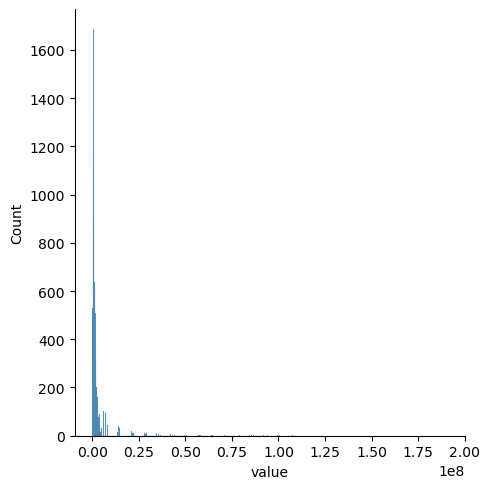

In [18]:
sns.displot(df['value'])

<Axes: >

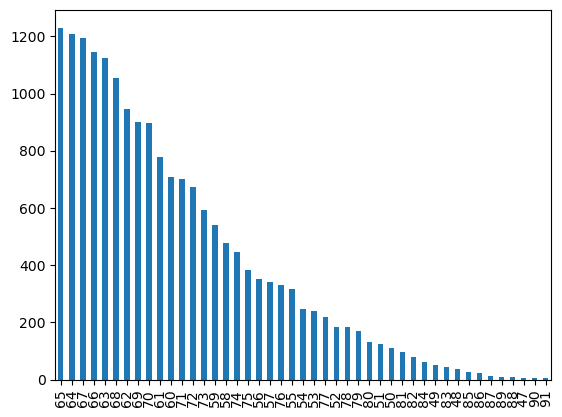

In [19]:
df['overall_rating'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

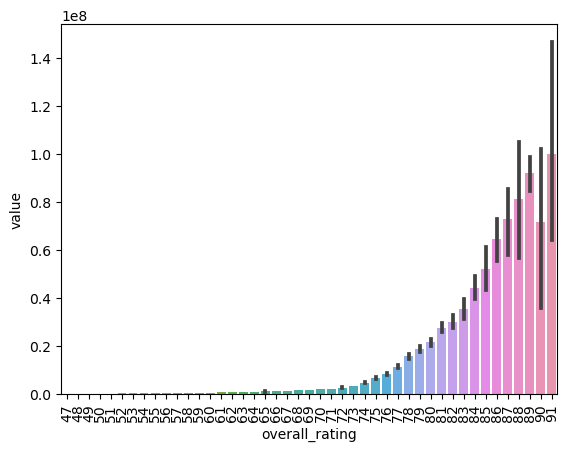

In [20]:
sns.barplot(x=df['overall_rating'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<Figure size 2000x1000 with 0 Axes>

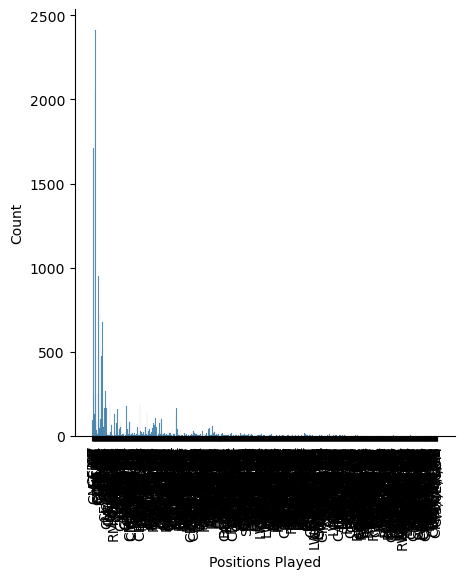

In [21]:
plt.figure(figsize=(20, 10))  # Adjust the width and height as needed

# Create the distribution plot
sns.displot(data=df, x='Positions Played', kind='hist')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

In [22]:
df.drop(columns=['Positions Played'],inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

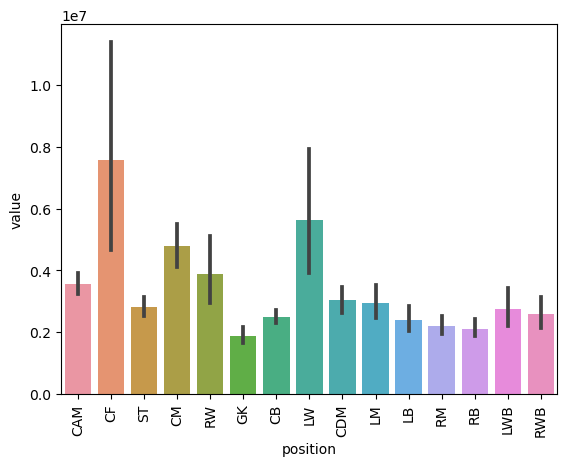

In [23]:
sns.barplot(x=df['position'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

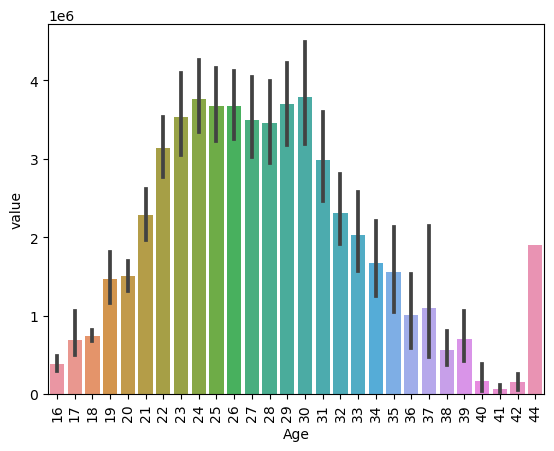

In [24]:
sns.barplot(x=df['Age'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

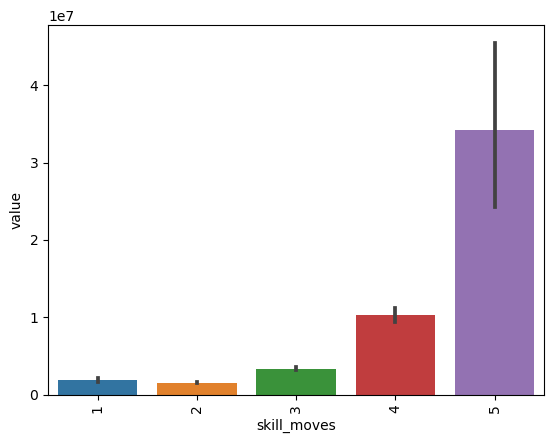

In [25]:
sns.barplot(x=df['skill_moves'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

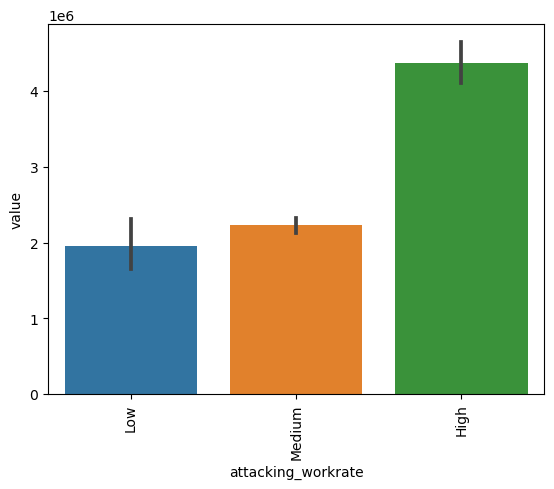

In [26]:
sns.barplot(x=df['attacking_workrate'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

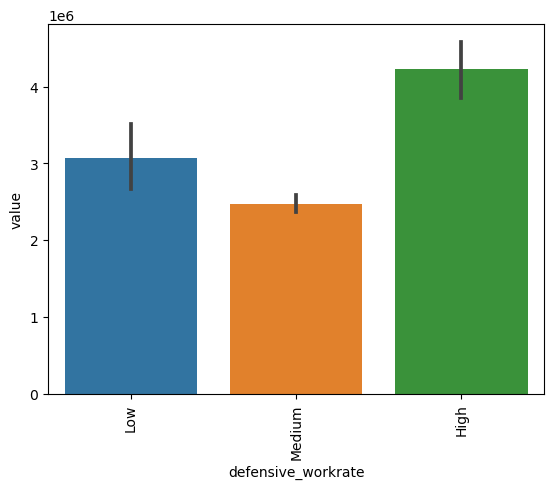

In [27]:
sns.barplot(x=df['defensive_workrate'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

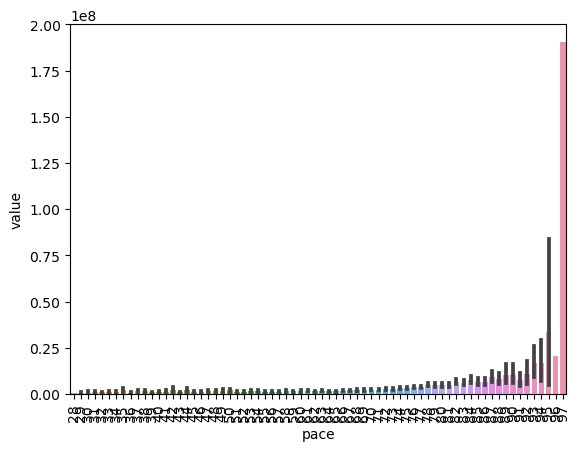

In [28]:
sns.barplot(x=df['pace'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

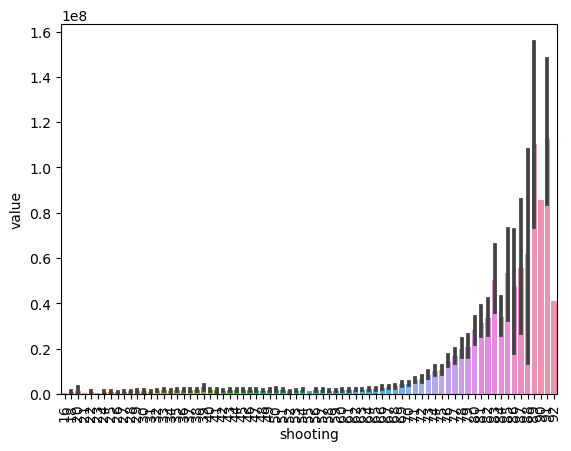

In [29]:
sns.barplot(x=df['shooting'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

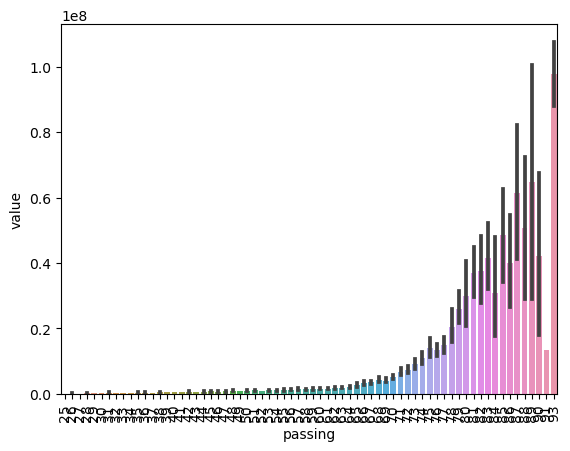

In [30]:
sns.barplot(x=df['passing'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

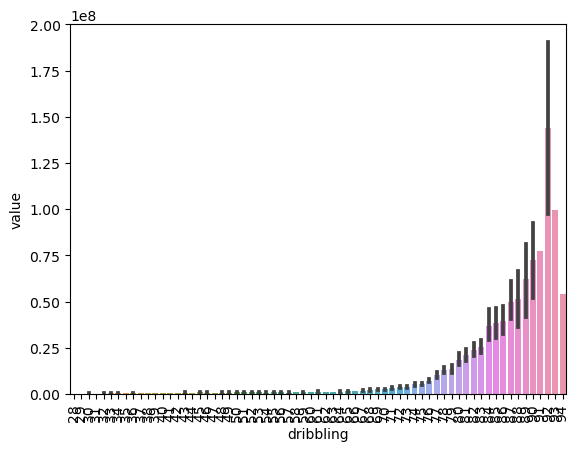

In [31]:
sns.barplot(x=df['dribbling'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

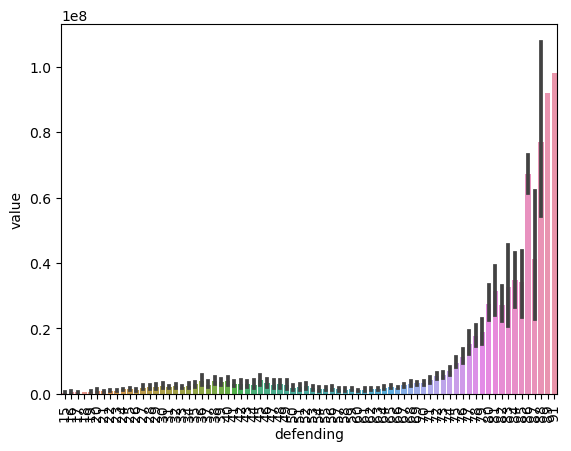

In [32]:
sns.barplot(x=df['defending'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

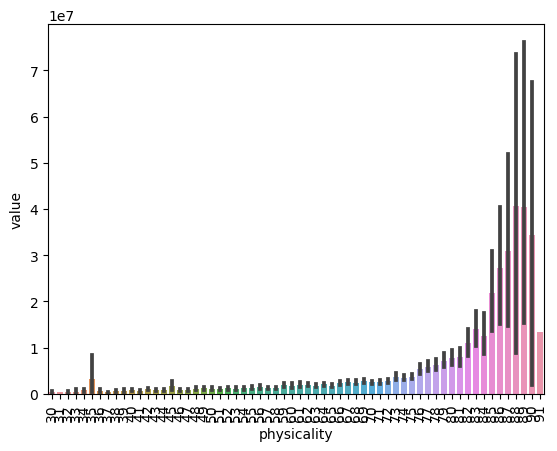

In [33]:
sns.barplot(x=df['physicality'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

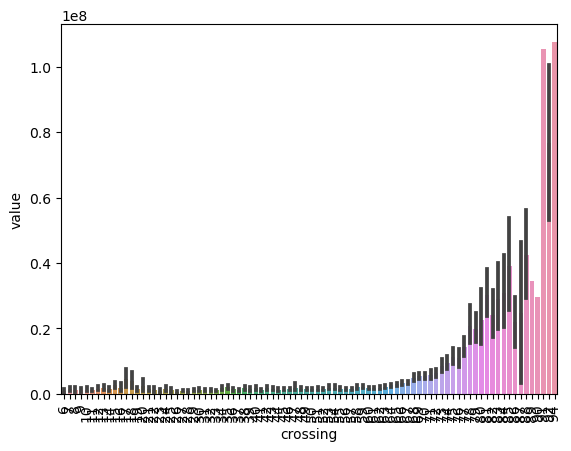

In [34]:
sns.barplot(x=df['crossing'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

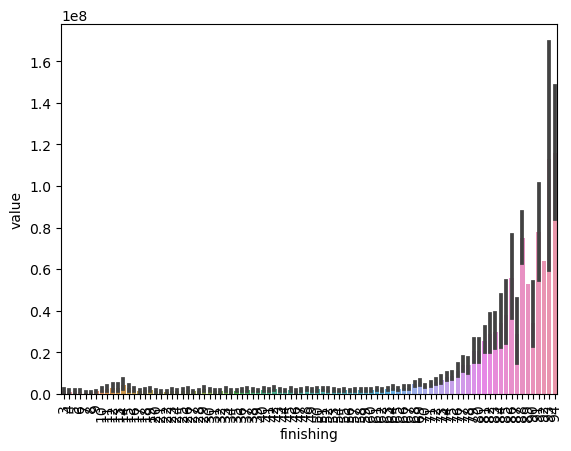

In [35]:
sns.barplot(x=df['finishing'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

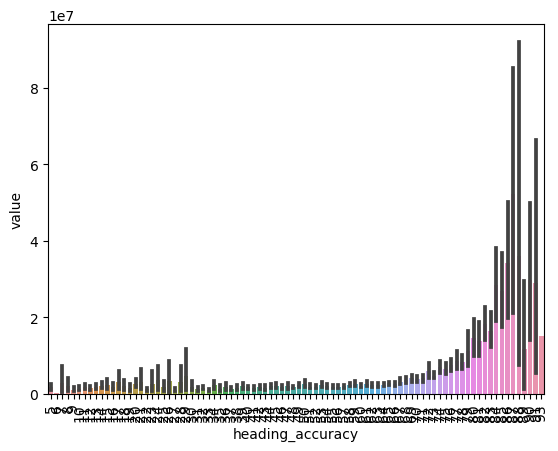

In [36]:
sns.barplot(x=df['heading_accuracy'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

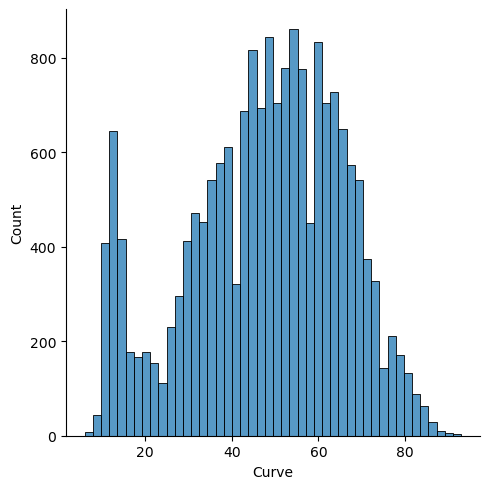

In [37]:
sns.displot(df['Curve'])

<function matplotlib.pyplot.show(close=None, block=None)>

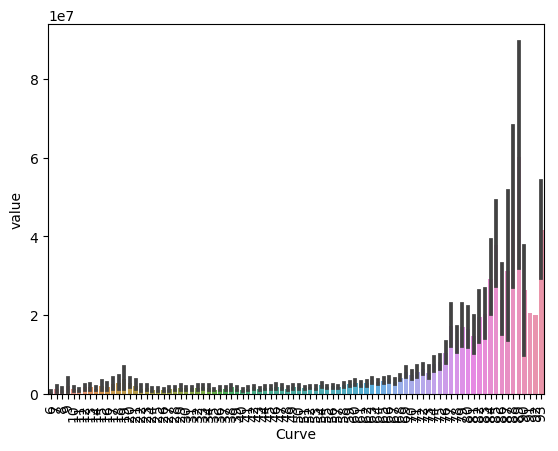

In [38]:
sns.barplot(x=df['Curve'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

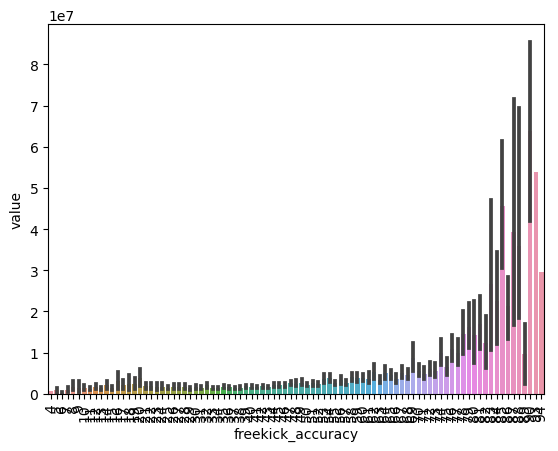

In [39]:
sns.barplot(x=df['freekick_accuracy'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

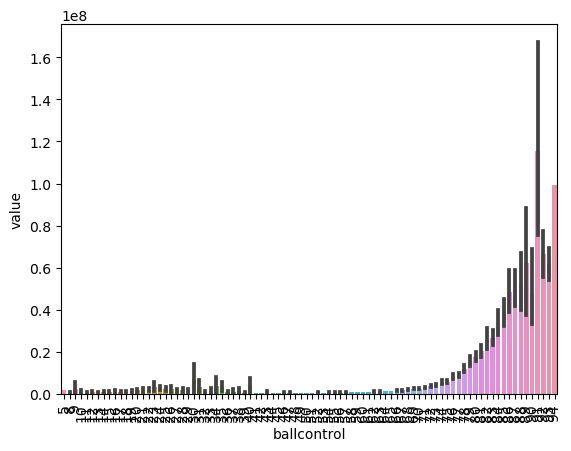

In [40]:
sns.barplot(x=df['ballcontrol'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

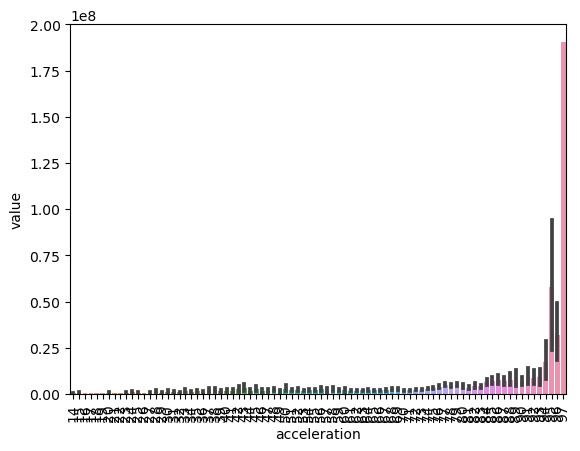

In [41]:
sns.barplot(x=df['acceleration'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

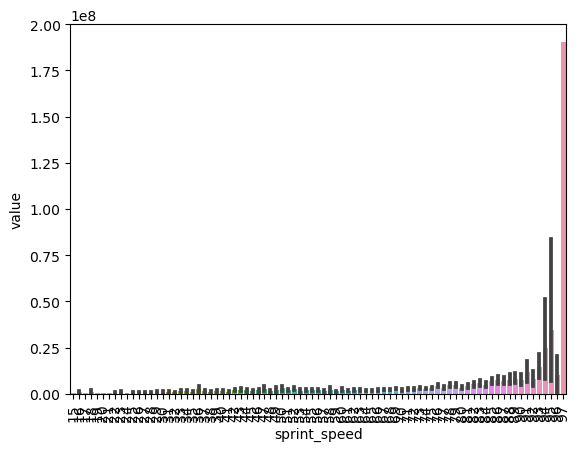

In [42]:
sns.barplot(x=df['sprint_speed'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

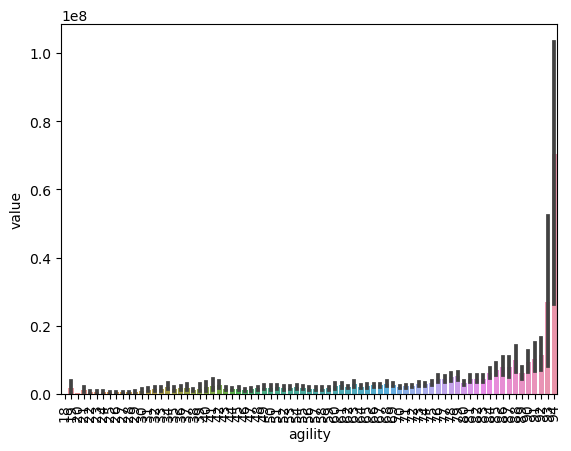

In [43]:
sns.barplot(x=df['agility'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

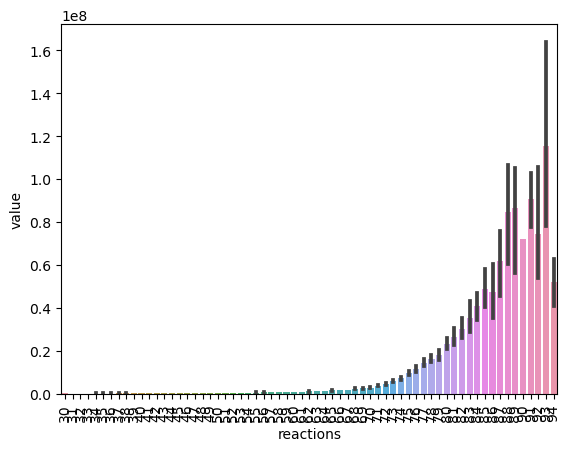

In [44]:
sns.barplot(x=df['reactions'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

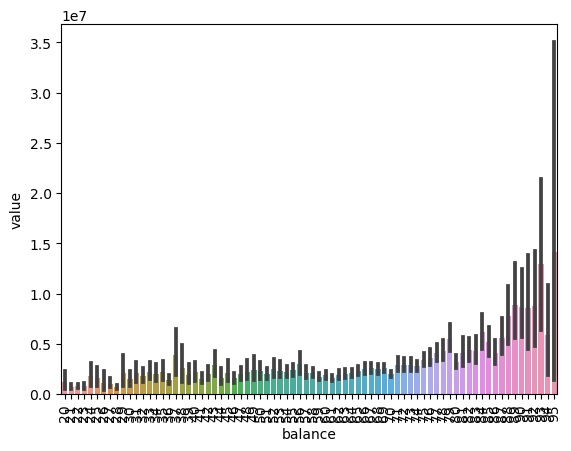

In [45]:
sns.barplot(x=df['balance'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

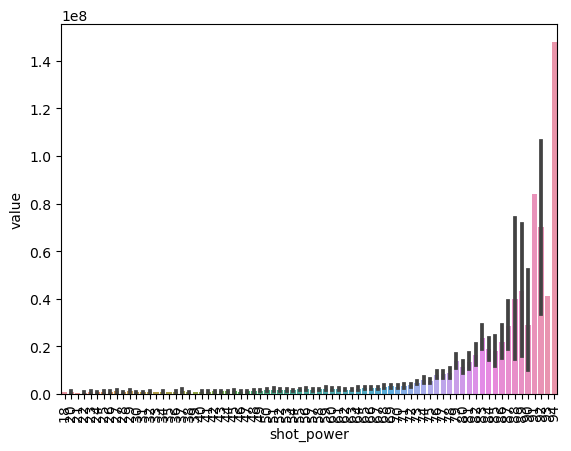

In [46]:
sns.barplot(x=df['shot_power'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

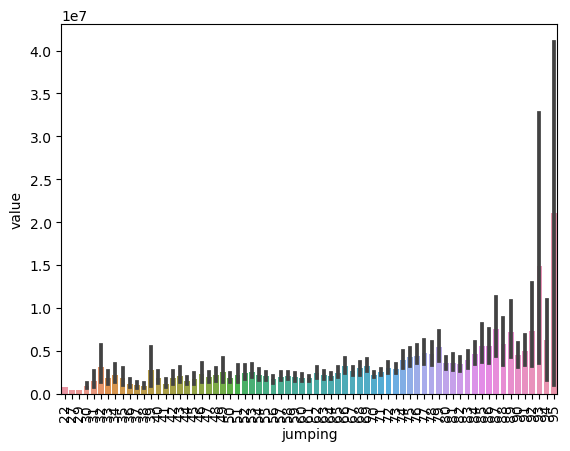

In [47]:
sns.barplot(x=df['jumping'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

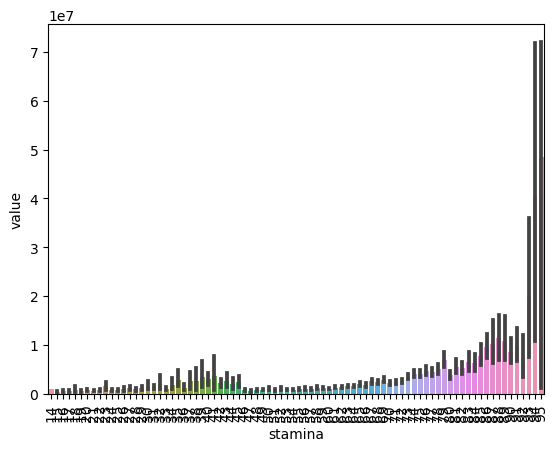

In [48]:
sns.barplot(x=df['stamina'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

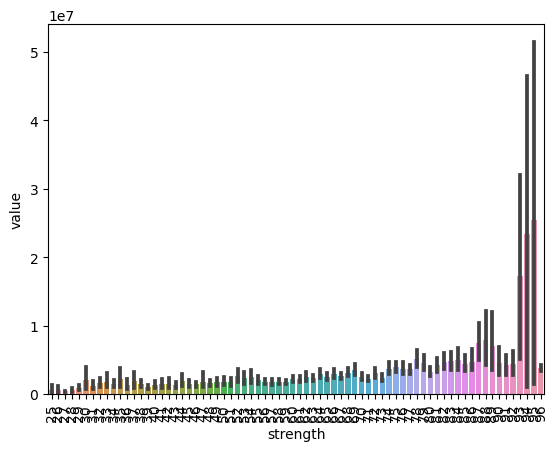

In [49]:
sns.barplot(x=df['strength'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

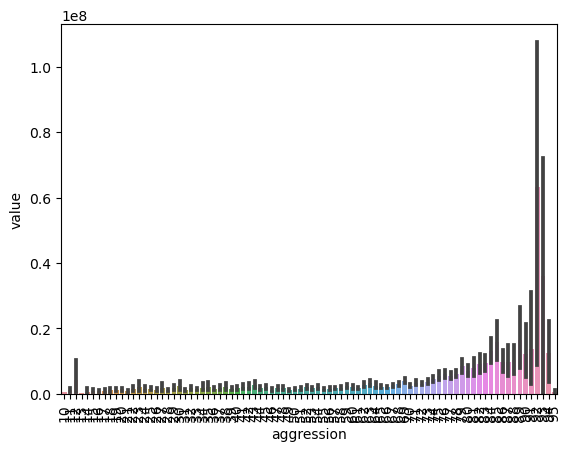

In [50]:
sns.barplot(x=df['aggression'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

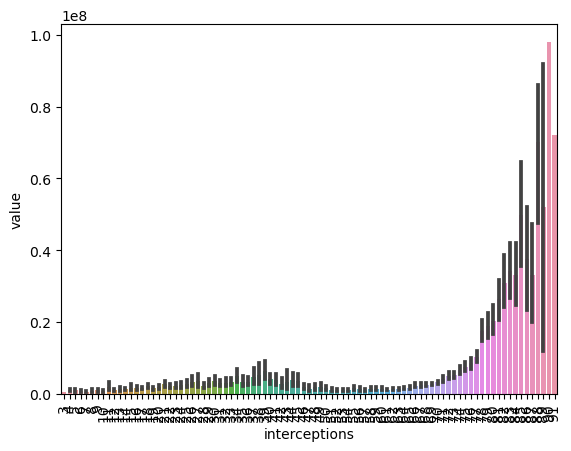

In [51]:
sns.barplot(x=df['interceptions'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

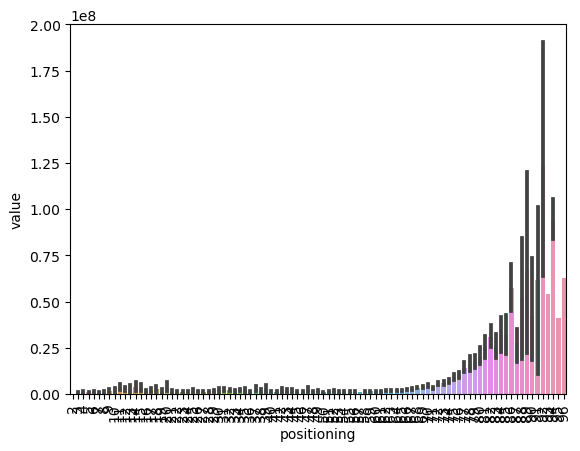

In [52]:
sns.barplot(x=df['positioning'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

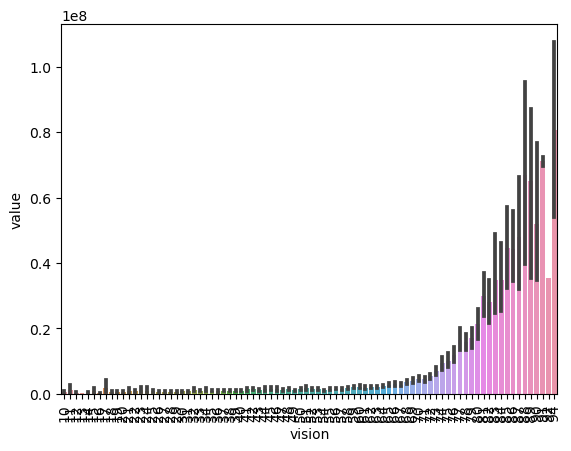

In [53]:
sns.barplot(x=df['vision'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

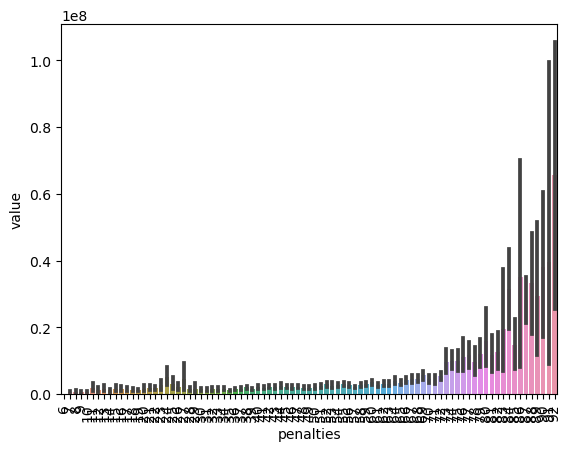

In [54]:
sns.barplot(x=df['penalties'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

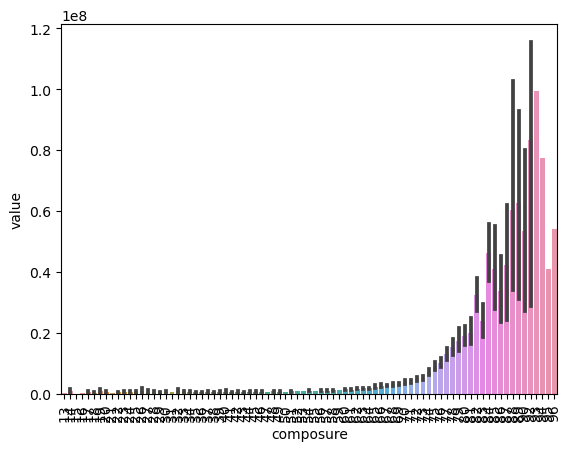

In [55]:
sns.barplot(x=df['composure'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

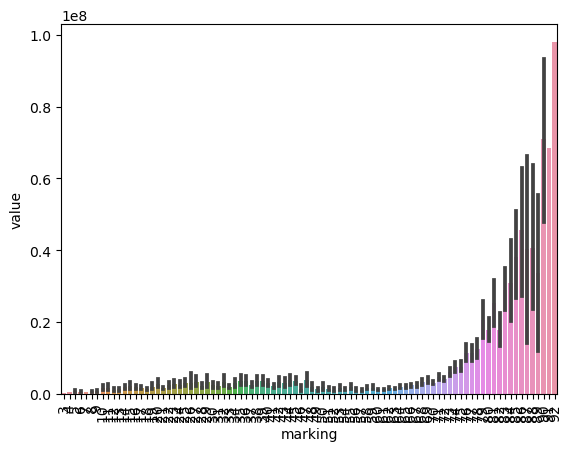

In [56]:
sns.barplot(x=df['marking'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

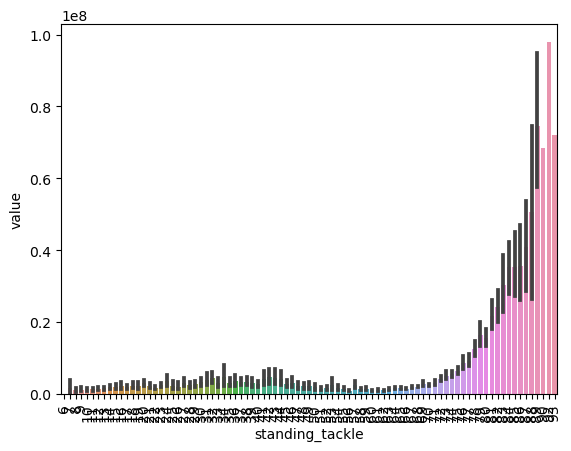

In [57]:
sns.barplot(x=df['standing_tackle'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

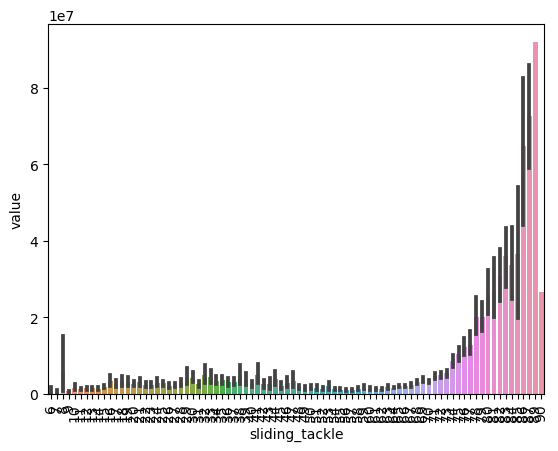

In [58]:
sns.barplot(x=df['sliding_tackle'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

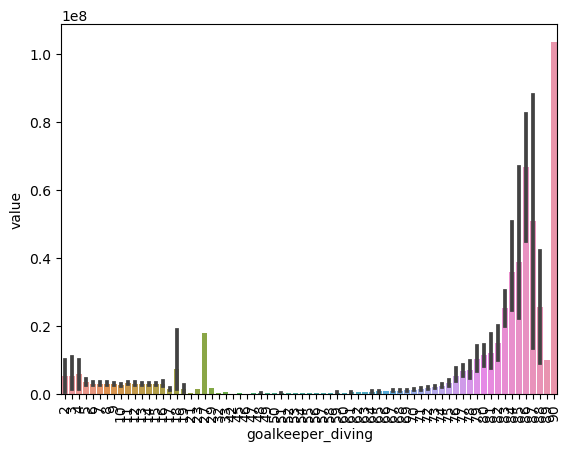

In [59]:
sns.barplot(x=df['goalkeeper_diving'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

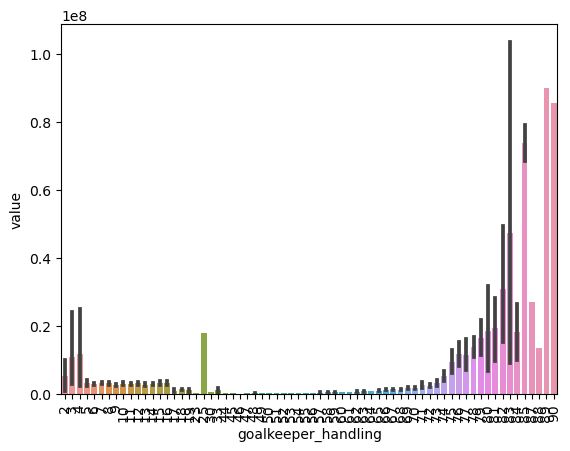

In [60]:
sns.barplot(x=df['goalkeeper_handling'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

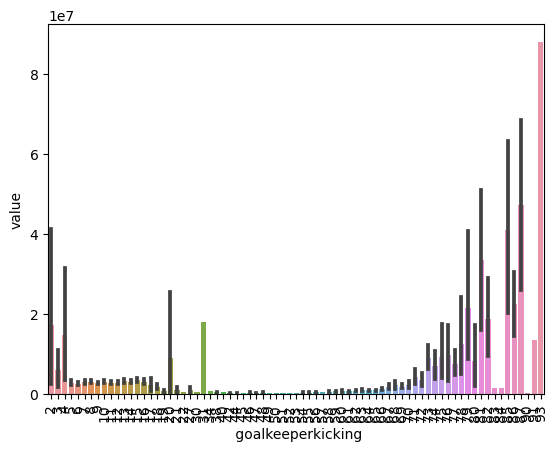

In [61]:
sns.barplot(x=df[' goalkeeperkicking'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

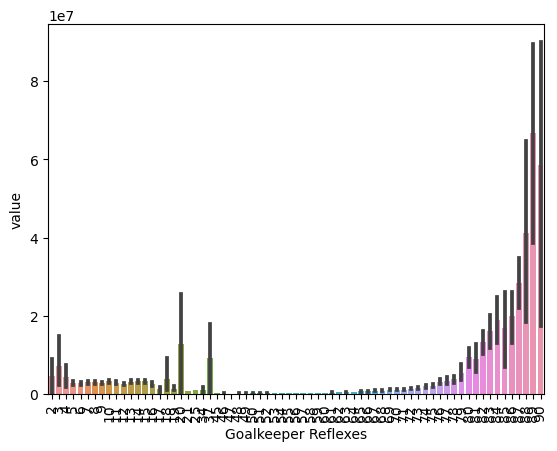

In [62]:
sns.barplot(x=df['Goalkeeper Reflexes'],y=df['value'])
plt.xticks(rotation='vertical')
plt.show

In [63]:
df.rename(columns={'Goalkeeper Reflexes': 'goalkeeper_reflexes'}, inplace=True)

In [64]:
df.corr()['value']

C:\Users\vuYELwa thE\AppData\Local\Temp\ipykernel_5756\1634987583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['value']


overall_rating         0.560209
value                  1.000000
Age                    0.032708
skill_moves            0.247329
pace                   0.203616
shooting               0.274568
passing                0.398550
dribbling              0.404820
defending              0.162189
physicality            0.234025
crossing               0.228569
finishing              0.214991
heading_accuracy       0.166785
Curve                  0.252148
freekick_accuracy      0.210030
ballcontrol            0.271880
acceleration           0.157738
sprint_speed           0.164959
agility                0.169462
reactions              0.496979
balance                0.119911
shot_power             0.302128
jumping                0.111304
stamina                0.196196
strength               0.129289
aggression             0.186210
interceptions          0.144351
positioning            0.219458
vision                 0.328143
penalties              0.189401
composure              0.389631
marking 

In [65]:
def sort_correlations(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Sort correlations in descending order
    sorted_correlations = corr_matrix['value'].sort_values(ascending=False)

    return sorted_correlations

# Call the function with your DataFrame
sorted_correlations = sort_correlations(df)

# Print the sorted correlations
print(sorted_correlations)


C:\Users\vuYELwa thE\AppData\Local\Temp\ipykernel_5756\1400491896.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


value                  1.000000
overall_rating         0.560209
reactions              0.496979
dribbling              0.404820
passing                0.398550
composure              0.389631
vision                 0.328143
shot_power             0.302128
shooting               0.274568
ballcontrol            0.271880
Curve                  0.252148
skill_moves            0.247329
physicality            0.234025
crossing               0.228569
positioning            0.219458
finishing              0.214991
freekick_accuracy      0.210030
pace                   0.203616
stamina                0.196196
penalties              0.189401
aggression             0.186210
agility                0.169462
heading_accuracy       0.166785
sprint_speed           0.164959
defending              0.162189
acceleration           0.157738
interceptions          0.144351
marking                0.144289
standing_tackle        0.129888
strength               0.129289
balance                0.119911
sliding_

## For the sake of System Accuracy, we are going to select the top 20 attribute columns that have high corelation with player and use the for training and testing. Hemce we drop all the columns that have less correlation with value.

In [66]:
# Drop specified columns

df.drop(columns=['penalties', 'heading_accuracy', 'acceleration', 'standing_tackle', 
'strength', 'sliding_tackle', 'jumping', 'Age', 'goalkeeper_reflexes', 
' goalkeeperkicking', 'goalkeeper_handling', 'goalkeeper_diving'], inplace=True)


C:\Users\vuYELwa thE\AppData\Local\Temp\ipykernel_5756\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

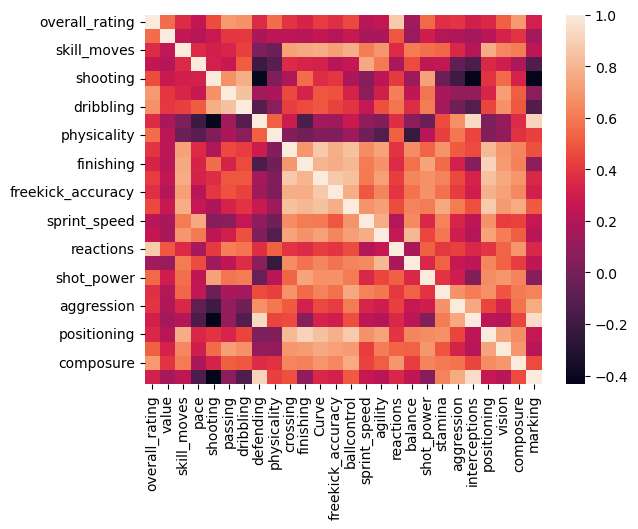

In [67]:
sns.heatmap(df.corr())

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18420 entries, 0 to 18538
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall_rating      18420 non-null  int64  
 1   value               18420 non-null  float64
 2   position            18420 non-null  object 
 3   skill_moves         18420 non-null  int64  
 4   attacking_workrate  18420 non-null  object 
 5   defensive_workrate  18420 non-null  object 
 6   pace                18420 non-null  int64  
 7   shooting            18420 non-null  int64  
 8   passing             18420 non-null  int64  
 9   dribbling           18420 non-null  int64  
 10  defending           18420 non-null  int64  
 11  physicality         18420 non-null  int64  
 12  crossing            18420 non-null  int64  
 13  finishing           18420 non-null  int64  
 14  Curve               18420 non-null  int64  
 15  freekick_accuracy   18420 non-null  int64  
 16  ball

In [69]:
df.to_csv('Cleaned df.csv')

## 5.Model Training, Testing and Evaluation

In [70]:
X = df.drop(columns=['value'])
y = df['value']

In [71]:
X

,overall_rating,position,skill_moves,attacking_workrate,defensive_workrate,pace,shooting,passing,dribbling,defending,...,reactions,balance,shot_power,stamina,aggression,interceptions,positioning,vision,composure,marking
0,91,CAM,4,Low,Low,81,89,90,94,34,...,92,95,86,70,44,40,93,94,96,20
1,91,CF,4,Medium,Medium,80,88,83,87,39,...,92,72,87,82,63,39,92,89,90,43
2,91,ST,4,High,Medium,75,91,79,86,44,...,93,82,91,76,81,49,94,81,88,35
3,91,CM,4,High,High,74,88,93,87,64,...,91,78,92,88,75,66,88,94,89,68
4,91,ST,5,High,Low,97,89,80,92,36,...,93,81,88,87,64,38,92,83,88,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,CAM,2,Medium,Medium,68,48,43,51,31,...,44,63,50,32,37,22,50,52,47,39
18535,47,CDM,2,Medium,Medium,55,37,41,47,48,...,51,80,50,34,52,46,35,40,45,46
18536,47,RM,2,High,Medium,64,40,49,52,37,...,49,73,54,36,39,24,42,50,59,39
18537,47,CB,2,Medium,Medium,52,24,25,32,52,...,43,66,34,49,42,54,23,32,41,50


In [72]:
y

0         54000000.0
1         64000000.0
2         84000000.0
3        107500000.0
4        190500000.0
            ...     
18534       110000.0
18535        90000.0
18536       130000.0
18537       100000.0
18538        60000.0
Name: value, Length: 18420, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,mean_squared_error

In [75]:
ohe = OneHotEncoder()
ohe.fit(X[['position','attacking_workrate','defensive_workrate']])

OneHotEncoder()

In [76]:
column_trans = make_column_transformer((OneHotEncoder(),['position','attacking_workrate','defensive_workrate']),remainder='passthrough')

In [77]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',stehttp://localhost:8888/notebooks/Machine%20Learning%20Projects/BHORA-BHORA/Vuyelwa%20Player%20Bid%20Predictor.ipynb#Decision-Tree-Regressorp2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.31189014207183596
MAE 3257589.614077224


C:\Users\vuYELwa thE\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN

In [79]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\vuYELwa thE\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7518491291166448
MAE 1240251.5385450597


## Decision Tree Regressor

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\vuYELwa thE\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.80617820942932
MAE 1062614.6497096936


## Random Forest

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\vuYELwa thE\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8604632549058723
MAE 909526.9520168724


## Extra Trees Regressor

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [1,3,4])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=None,
                            max_features=0.75,
                            max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8279096760155957
MAE 933051.6416444287


## Light GBM

In [83]:
import lightgbm as lgb

# Assuming X_train, X_test, y_train, and y_test are defined

# Convert categorical features into one-hot encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train_encoded, label=y_train)
test_data = lgb.Dataset(X_test_encoded, label=y_test)

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mae',  # You can change the metric as needed
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
num_round = 5000  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test_encoded, num_iteration=bst.best_iteration)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8349145181153073
MAE: 914409.5191499545


In [84]:
import pickle

In [85]:
pickle.dump(pipe,open('RandomForestRegressor.pkl','wb'))

In [86]:
import pickle

# Load the saved pipeline
with open('RandomForestRegressor.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)



In [87]:
import joblib
print(joblib.__version__)



1.2.0
